REPORT MARDOWN



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def heatmap(table):
    plt.figure(figsize=(10, 10))
    mask = np.triu(np.ones_like(table.corr()))
    heatmap = sns.heatmap(table.corr(), mask=mask, annot=True)
    plt.show()


def plot_dataframe(df, title, x_label, y_label):
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def process(path, tab_name, row_to_skip, column_to_skip):
    df = pd.read_excel(path, sheet_name=tab_name, skiprows=row_to_skip)

    # Set the first row as column names and the first column as the index
    df.columns = df.iloc[0]
    df.index = df.iloc[:, 0]

    # Store the index for later use
    index = df.iloc[:, 0]

    # Remove the first row and the first column, and reset the index
    df = df.iloc[1:].reset_index(drop=True)
    df = df.iloc[:, 1:]

    # Set the index to the values from the stored index
    df.index = index.values[1:]

    df = df.iloc[:, :column_to_skip]

    return df

def table(df):
    stats = df.describe(percentiles=[.25, .5, .75])
    stats = stats.transpose()
    selected_columns = ['mean', '25%', '50%', '75%', 'std', 'min', 'max']
    table = stats[selected_columns]
    display(table)
    return table

US TREASURY TRADING VOLUME

In [5]:
path = "sifma/US-Treasury-Securities-Statistics-SIFMA.xlsx"

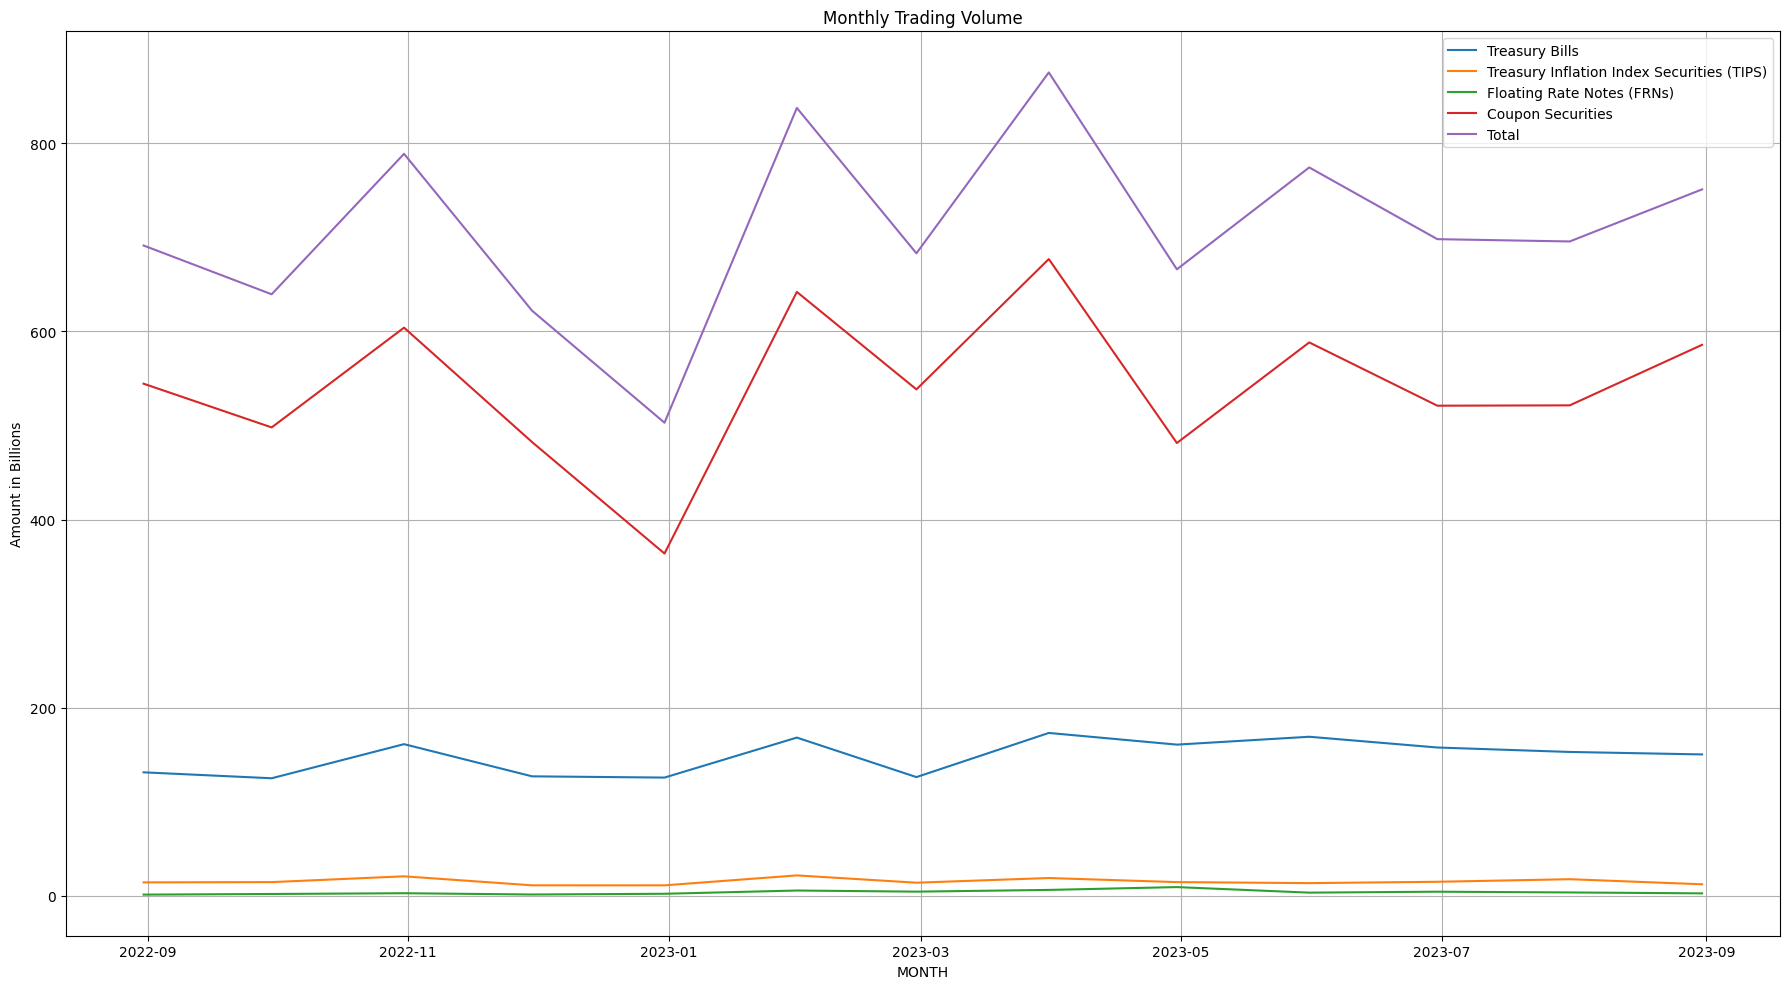

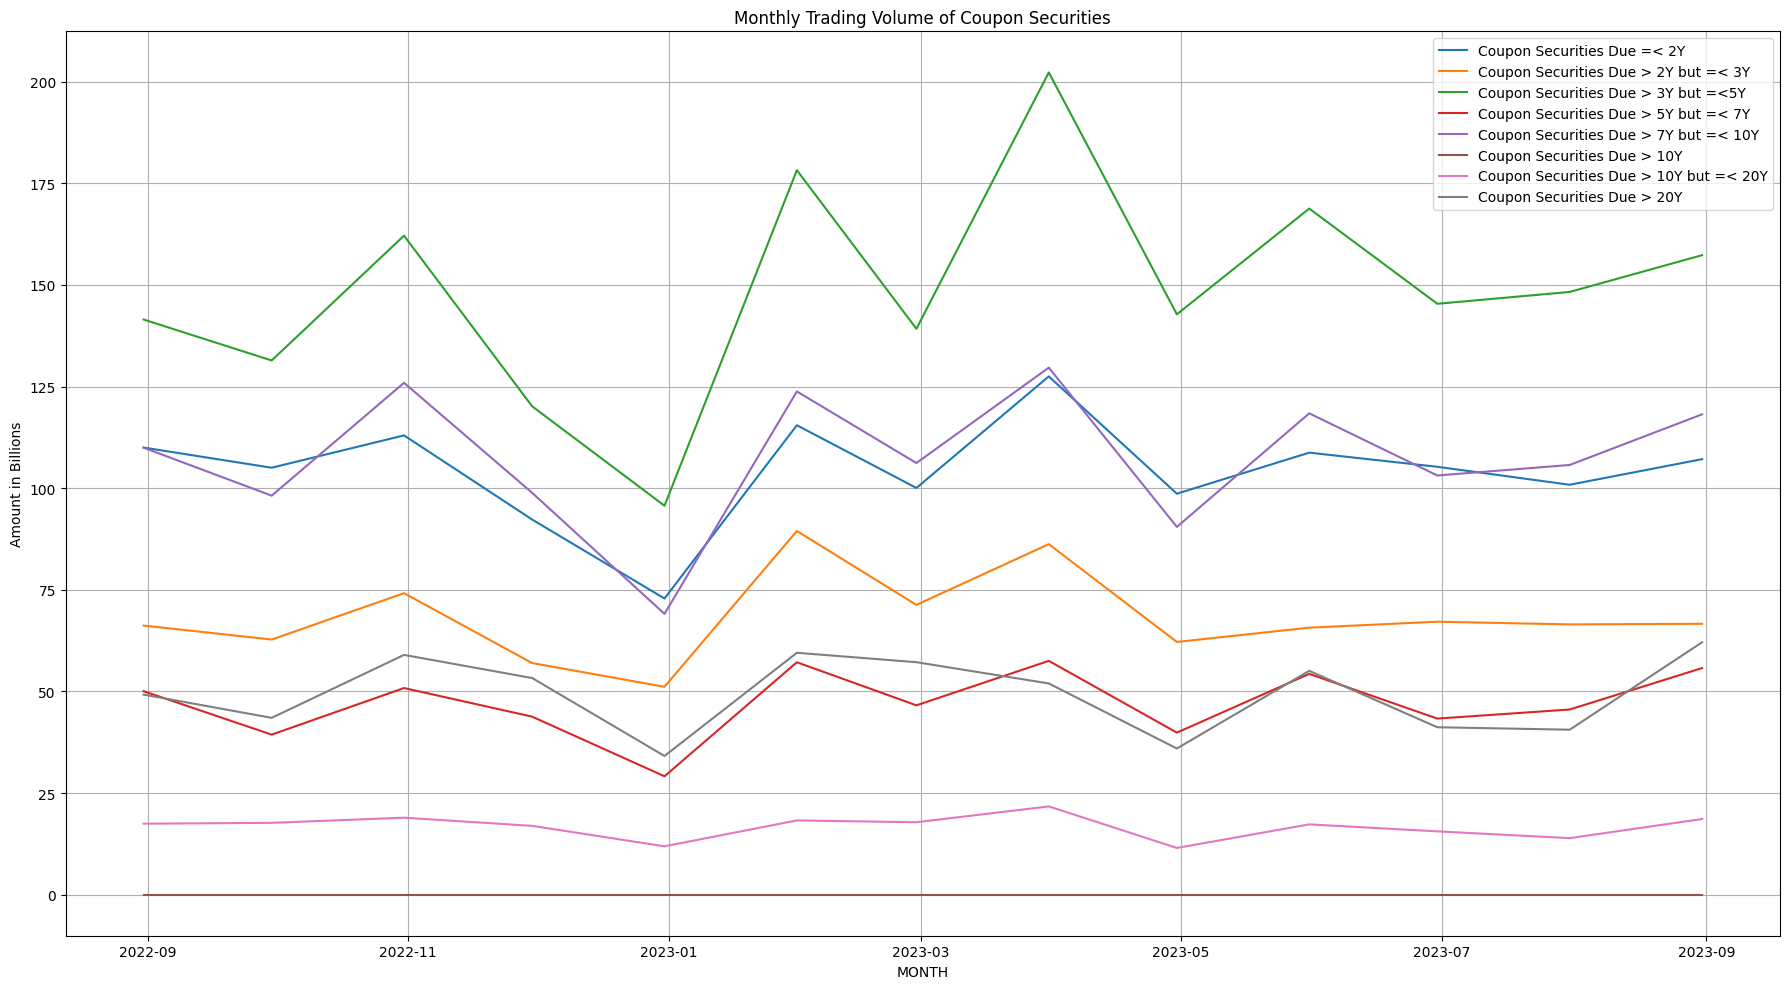

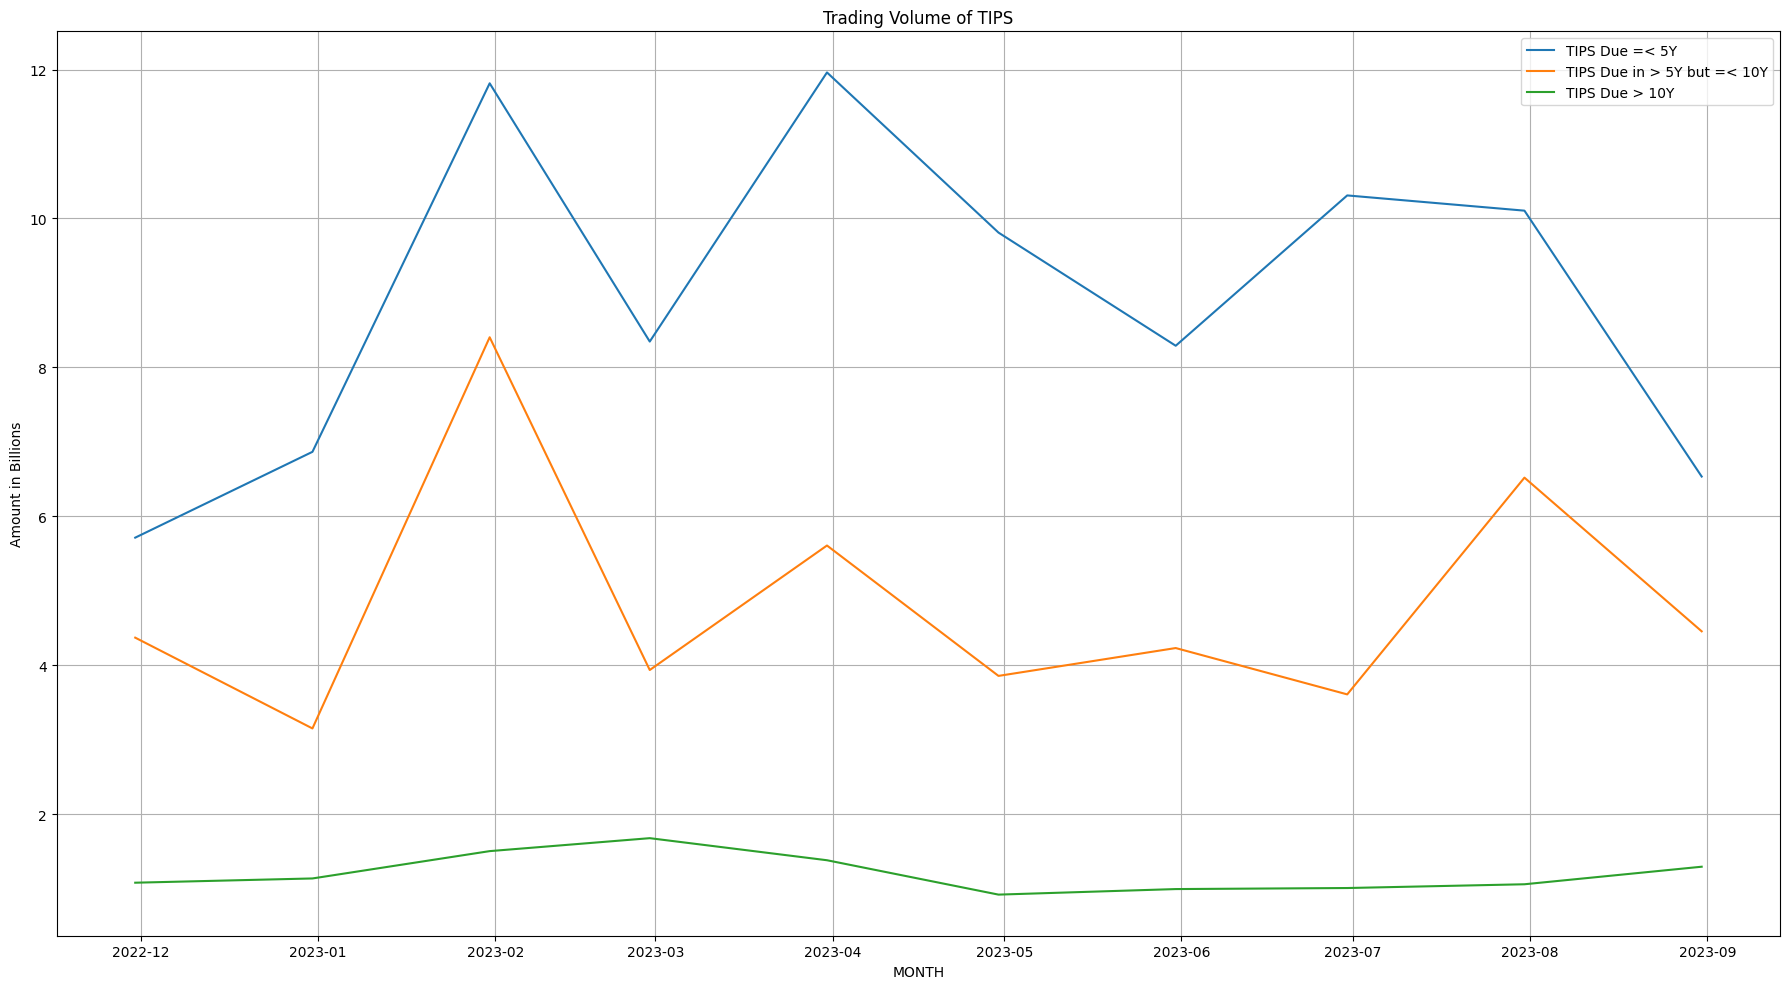

In [7]:
us_treasury = process(path, "Trading Volume", 7, 5)
us_treasury_trading_volume_monthly = us_treasury[25:]
plt.figure(figsize=(18, 10))
plot_dataframe(us_treasury_trading_volume_monthly,"Monthly Trading Volume","MONTH","Amount in Billions")

us_treasury = process(path, "Trading Volume", 7,14)
us_treasury_coupon_monthly = us_treasury.iloc[25:,6:]
# display(us_treasury)
plt.figure(figsize=(18, 10))
plot_dataframe(us_treasury_coupon_monthly,"Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

us_treasury = process(path, "Trading Volume", 7,18)
us_treasury_coupon_monthly = us_treasury.iloc[28:,15:]
# display(us_treasury)
plt.figure(figsize=(18, 10))
plot_dataframe(us_treasury_coupon_monthly,"Trading Volume of TIPS","MONTH","Amount in Billions")

US GCF REPO INDEX

In [8]:
path = "sifma/US-Repo-Statistics-SIFMA.xlsx"

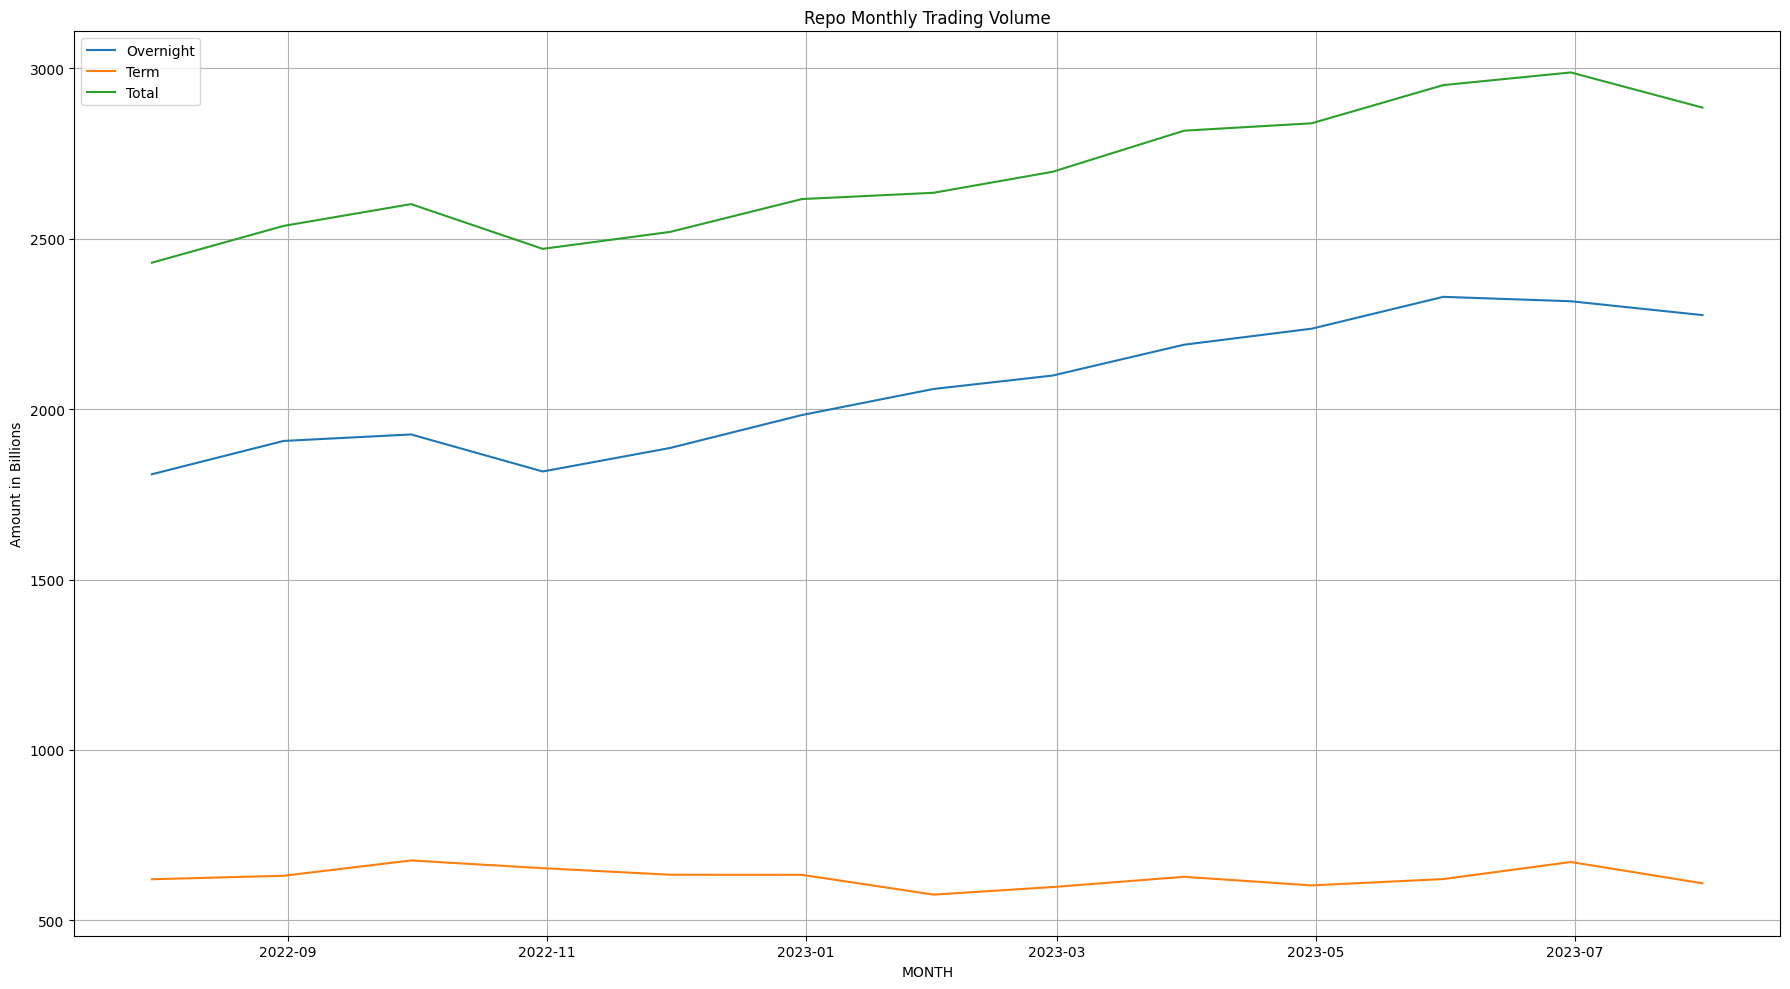

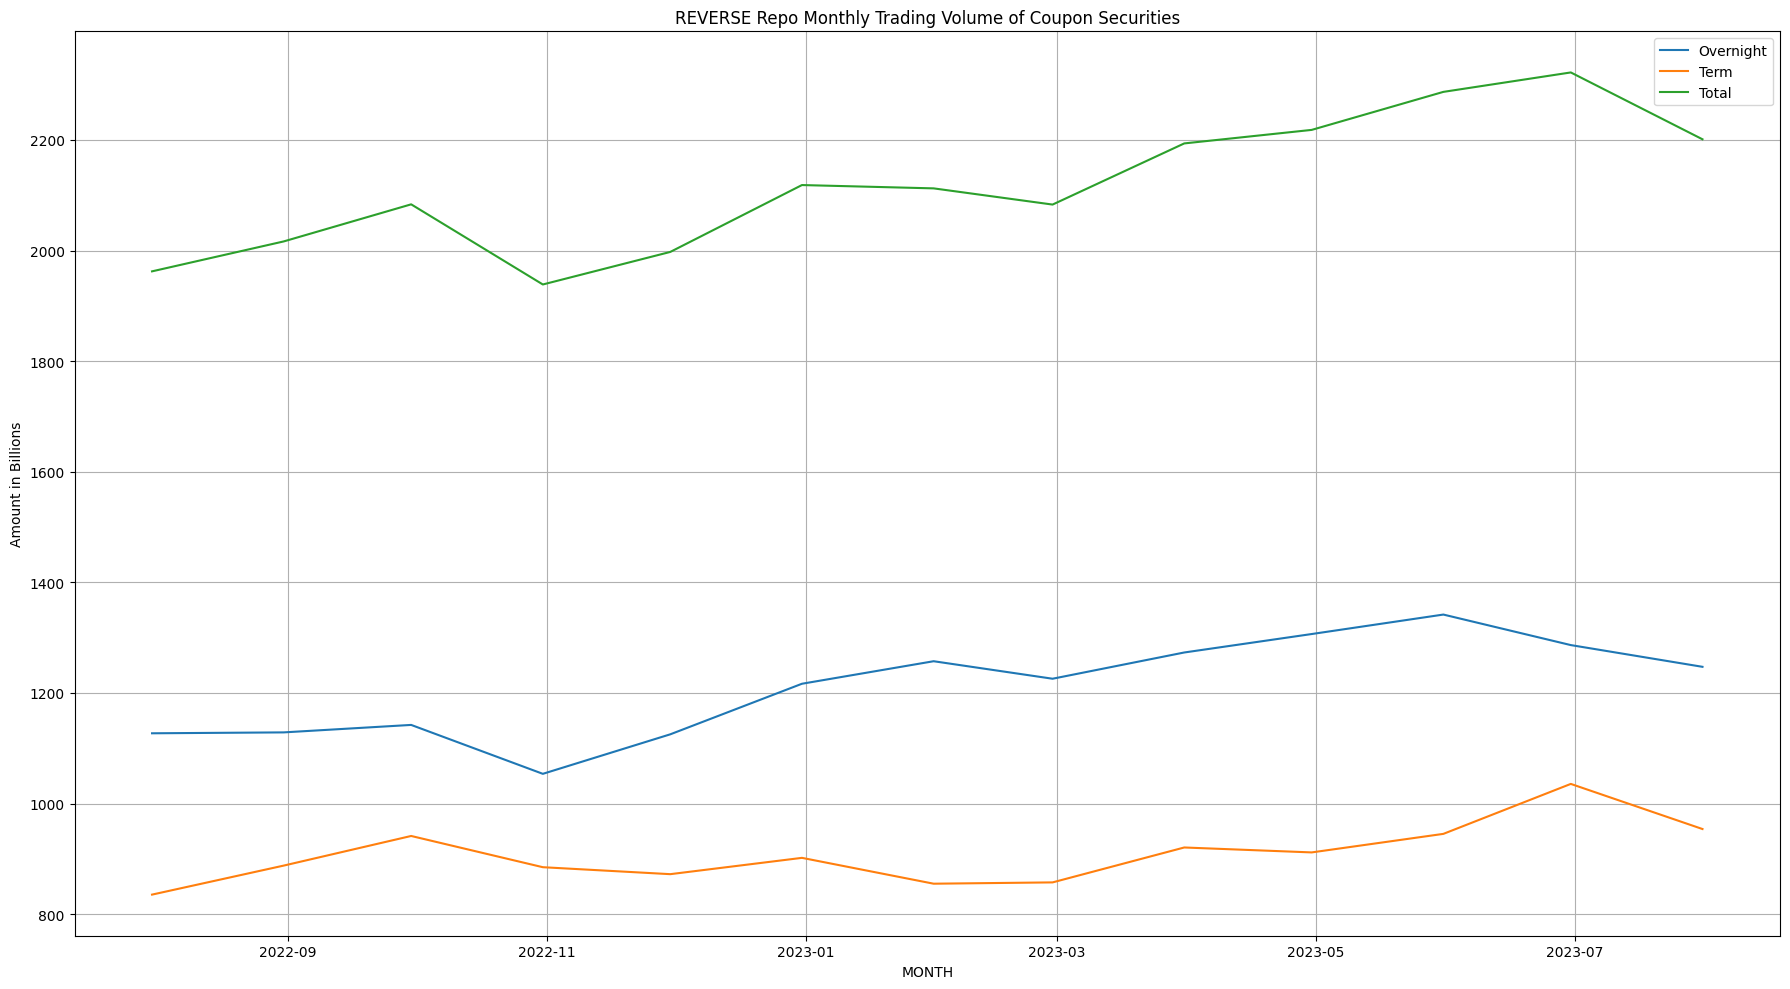

In [9]:
repo = process(path, "Primary Dealer", 7, 3)
repo_monthly = repo[25:]
plt.figure(figsize=(18, 10))
plot_dataframe(repo_monthly,"Repo Monthly Trading Volume","MONTH","Amount in Billions")

rev_repo = process(path, "Primary Dealer", 7,7)
rev_repo_monthly = rev_repo.iloc[25:,4:]
plt.figure(figsize=(18, 10))
plot_dataframe(rev_repo_monthly,"REVERSE Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

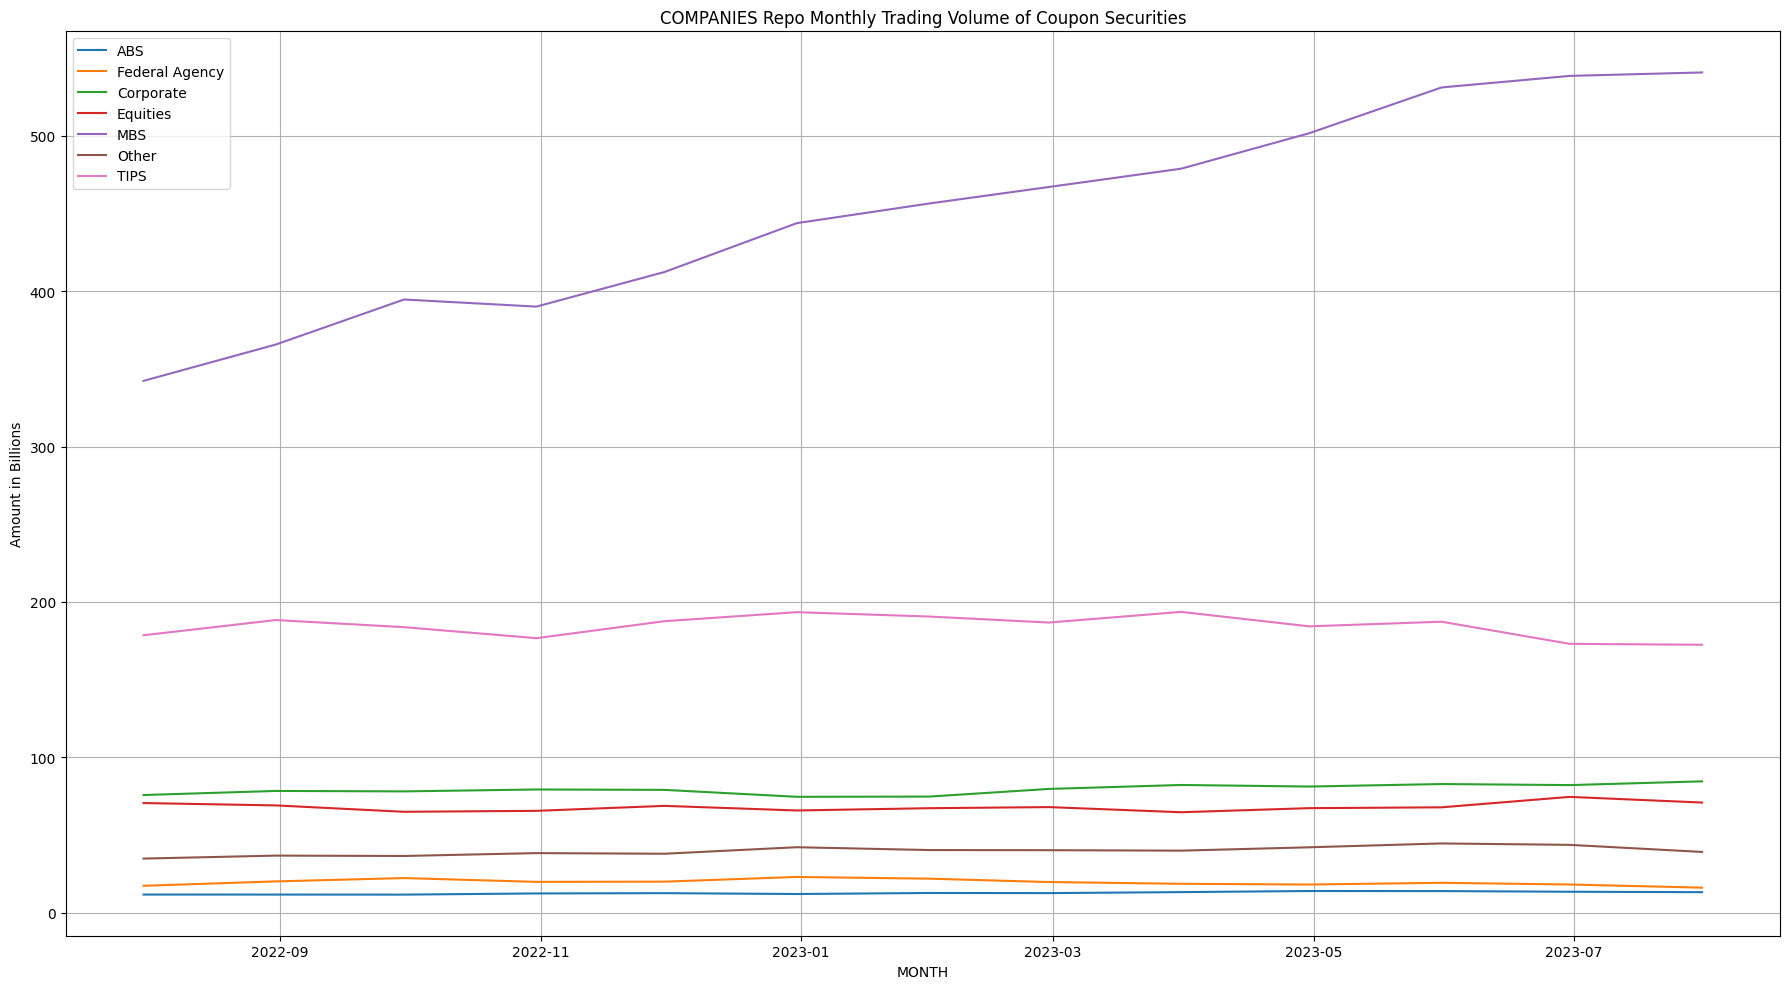

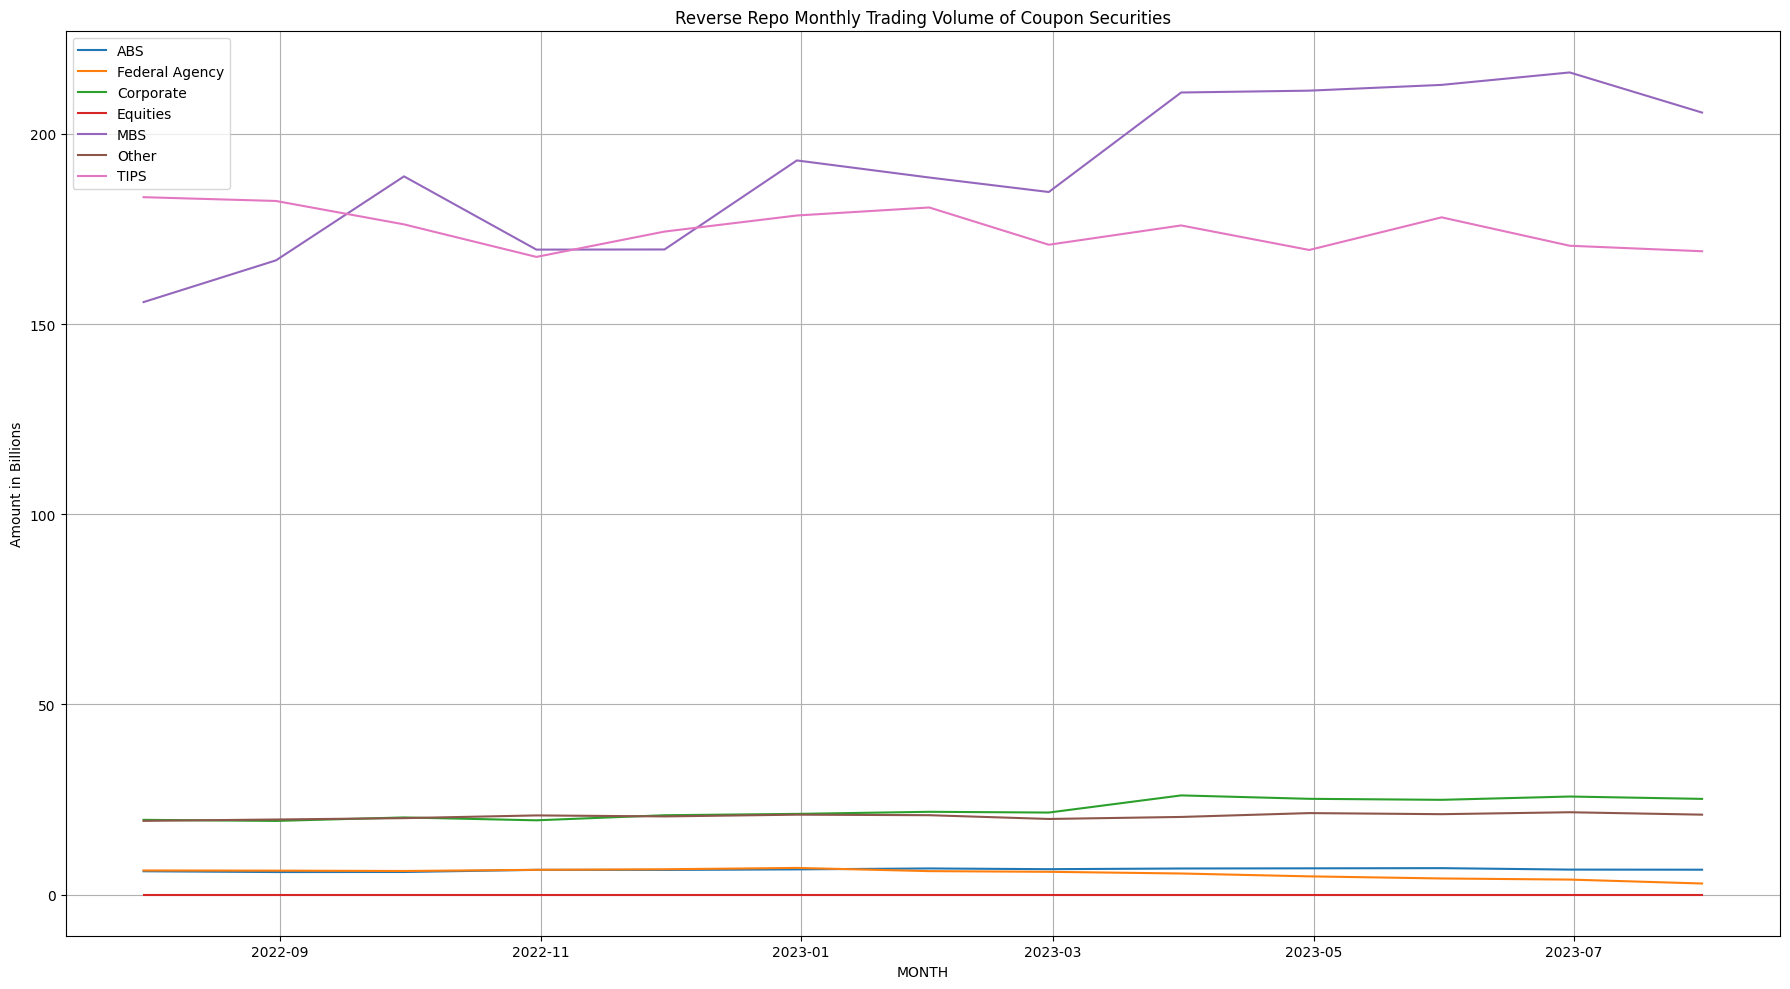

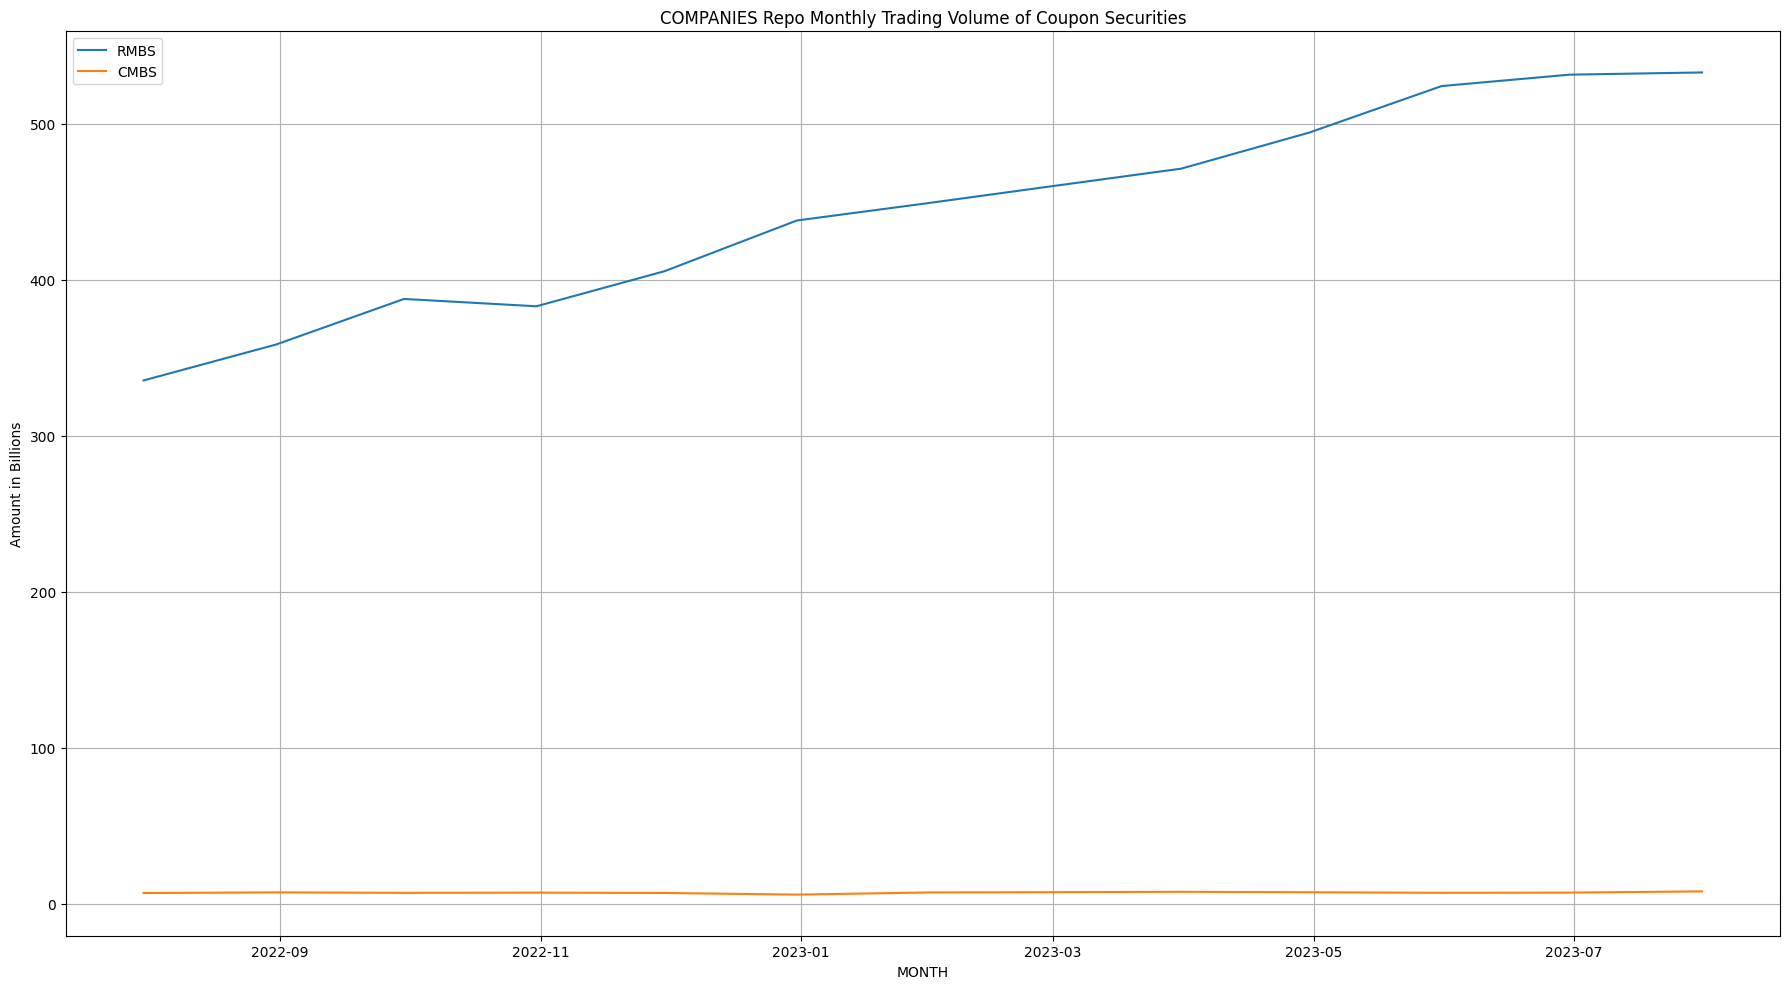

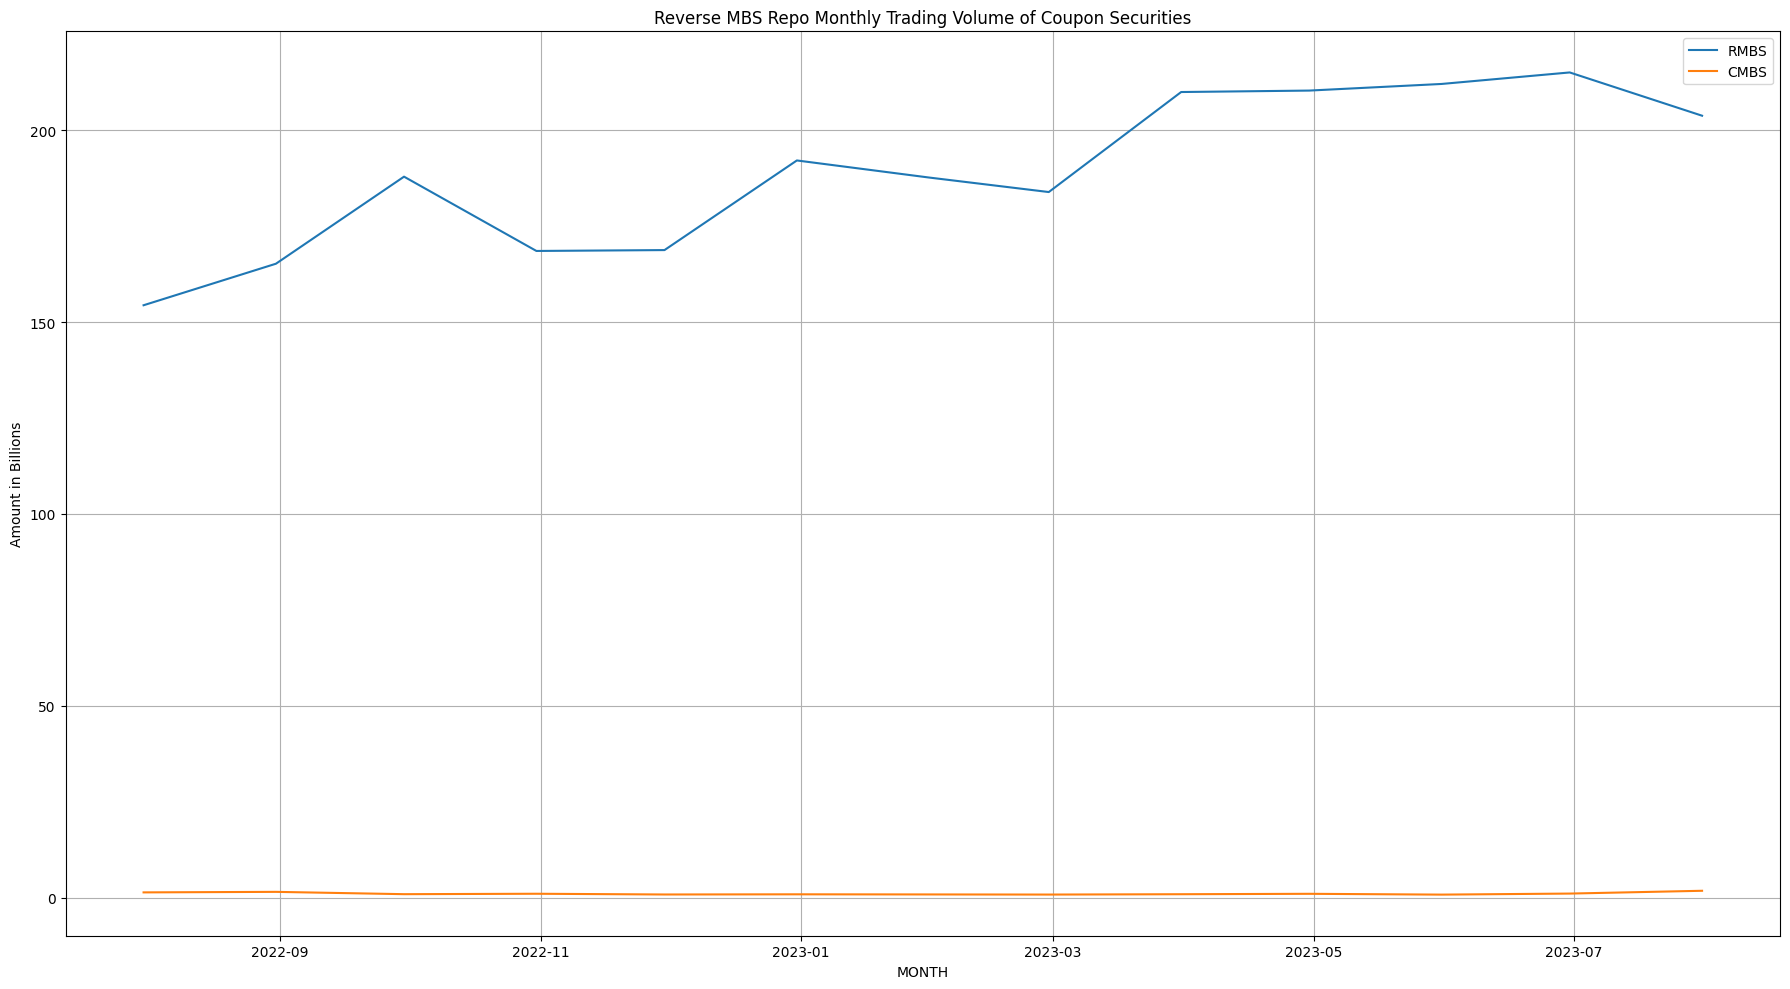

In [10]:
repo = process(path, "Primary Dealer", 7,17)
repo_monthly = repo.iloc[25:,10:]
repo_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(repo_monthly,"COMPANIES Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

repo_mbs = process(path, "Primary Dealer", 7,29)
mbs_repo_monthly = repo_mbs.iloc[25:,22:]
# repo_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(mbs_repo_monthly,"Reverse Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

repo = process(path, "Primary Dealer", 7,21)
repo_monthly = repo.iloc[25:,19:]
# repo_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(repo_monthly,"COMPANIES Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")



reverse_repo = process(path, "Primary Dealer", 7,33)
rev_repo_monthly = reverse_repo.iloc[25:,31:]
# rev_repo_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(rev_repo_monthly,"Reverse MBS Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

US EQUITY ISSUANCE AND TRADING VOLUMES

In [11]:
path = "sifma/US-Equities-and-Related-Statistics-SIFMA.xlsx"

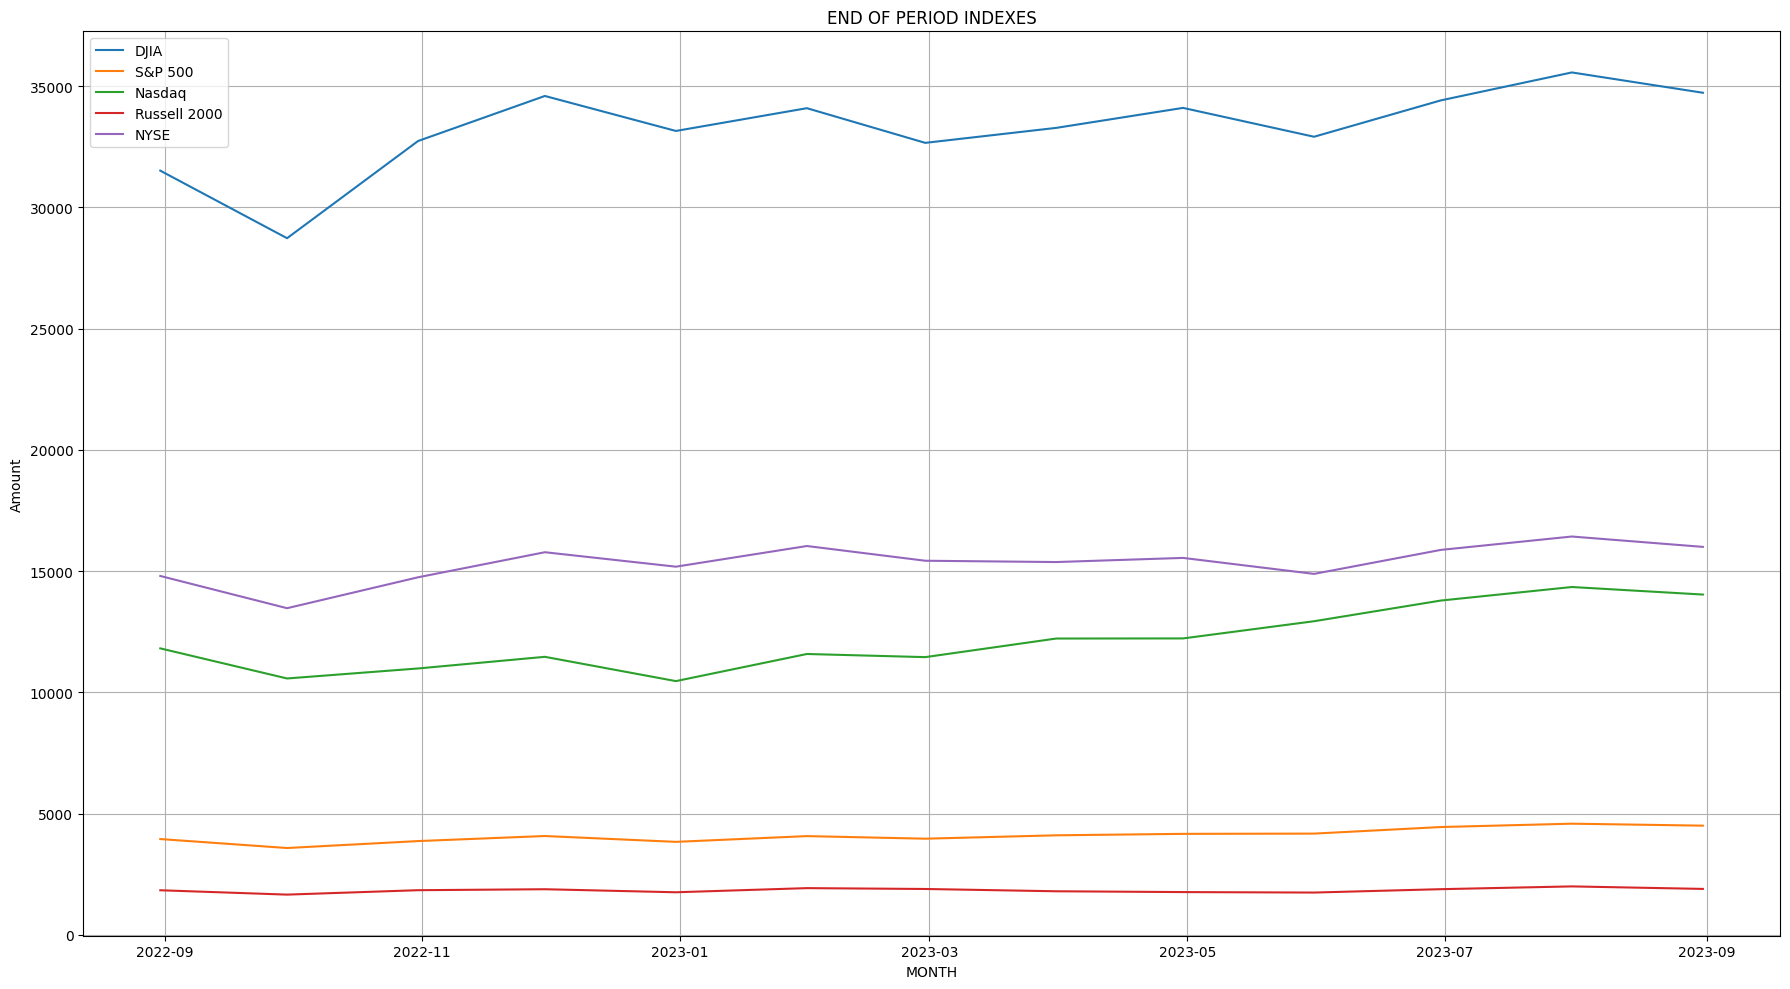

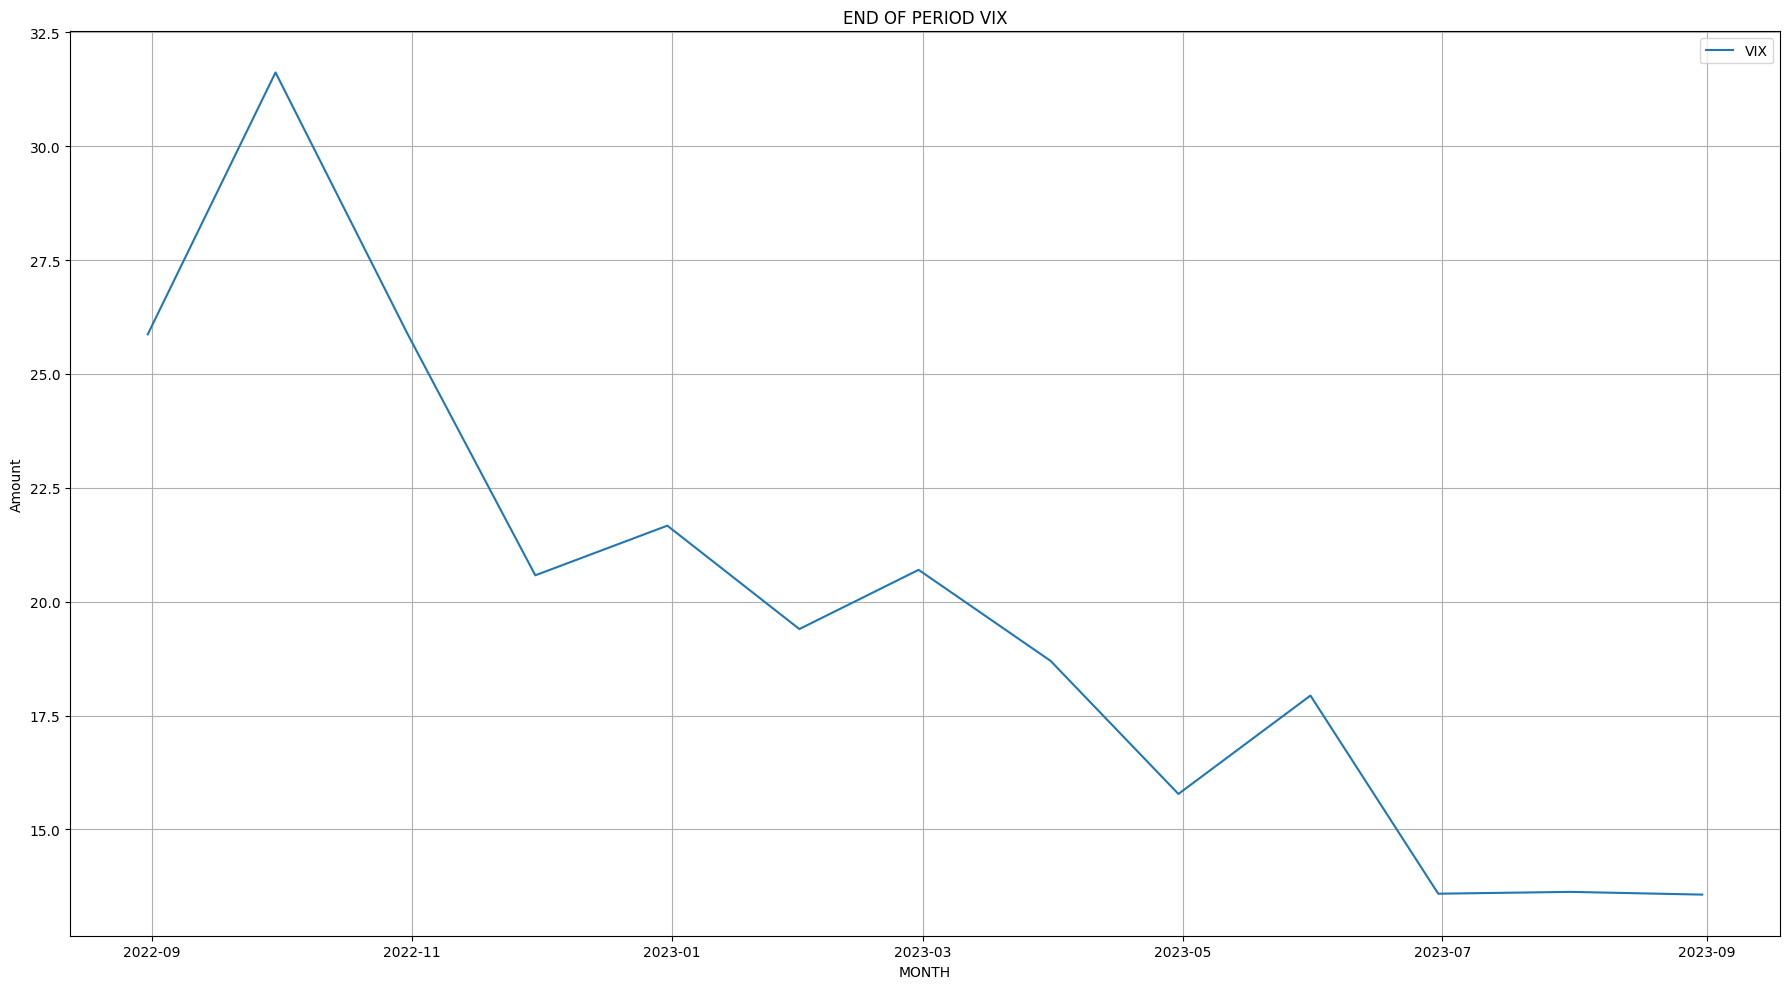

In [45]:
EOP = process(path, "Indexes & Volatility", 7,5)
EOP_monthly = EOP.iloc[25:]

plt.figure(figsize=(18, 10))
plot_dataframe(EOP_monthly,"END OF PERIOD INDEXES","MONTH","Amount")

eop_vix = process(path, "Indexes & Volatility", 7,6)
eop_vix = eop_vix.iloc[25:, 5:]
# eop_vix
plt.figure(figsize=(18, 10))
plot_dataframe(eop_vix,"END OF PERIOD VIX","MONTH","Amount")


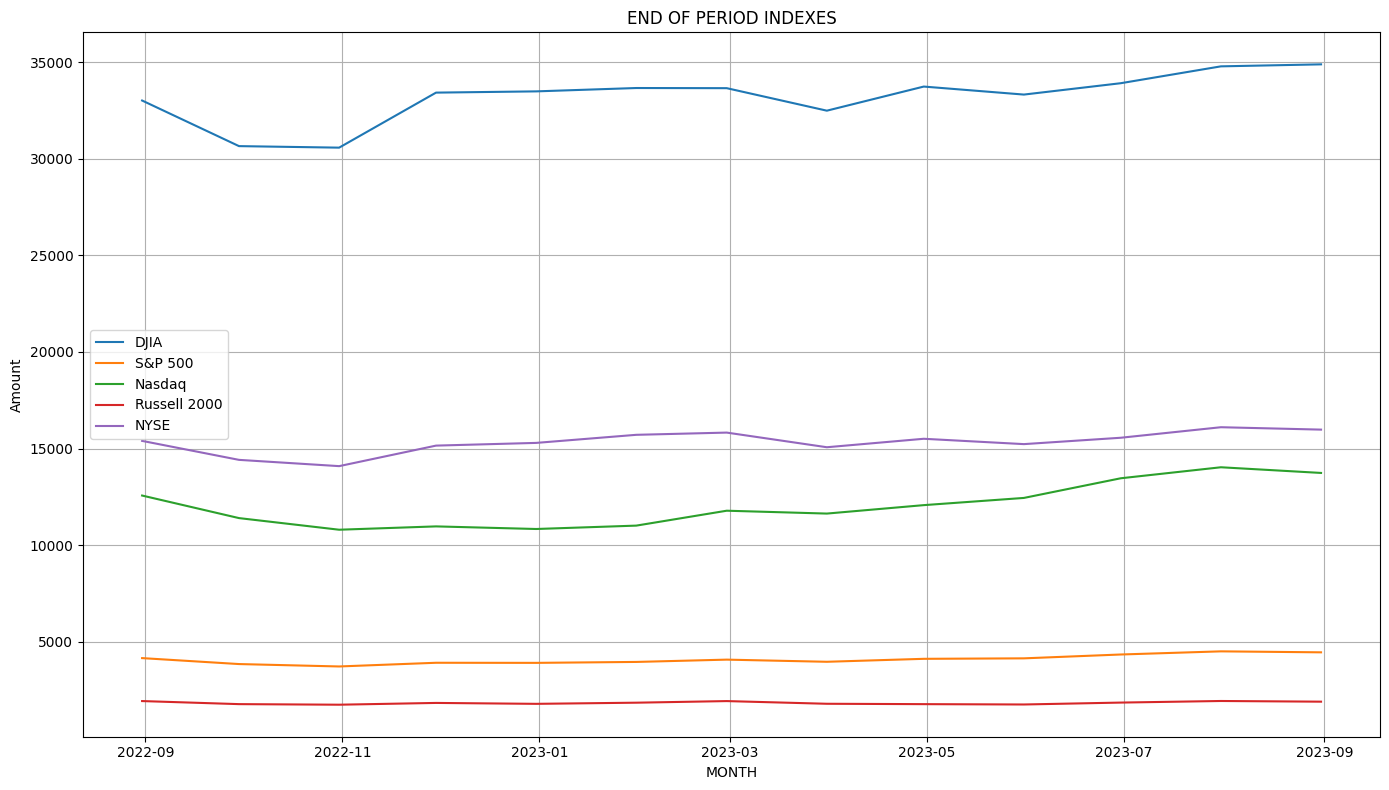

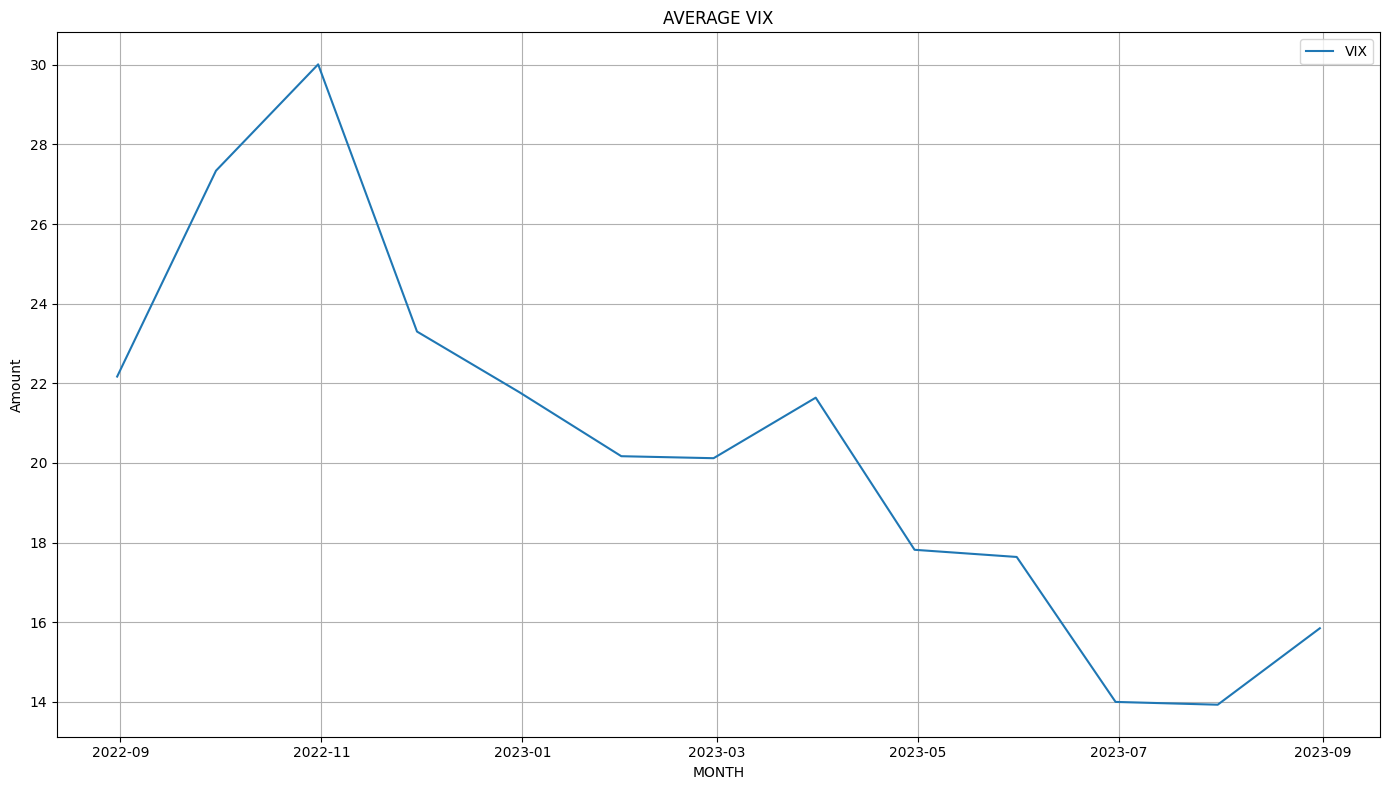

In [60]:
ave = process(path, "Indexes & Volatility", 7,12)
ave_monthly = ave.iloc[25:,7:]
ave_monthly
plt.figure(figsize=(14, 8))
plot_dataframe(ave_monthly,"END OF PERIOD INDEXES","MONTH","Amount")


ave_vix = process(path, "Indexes & Volatility", 7,13)
ave_vix = ave_vix.iloc[25:, 12:]
# eop_vix
plt.figure(figsize=(14, 8))
plot_dataframe(ave_vix,"AVERAGE VIX","MONTH","Amount")

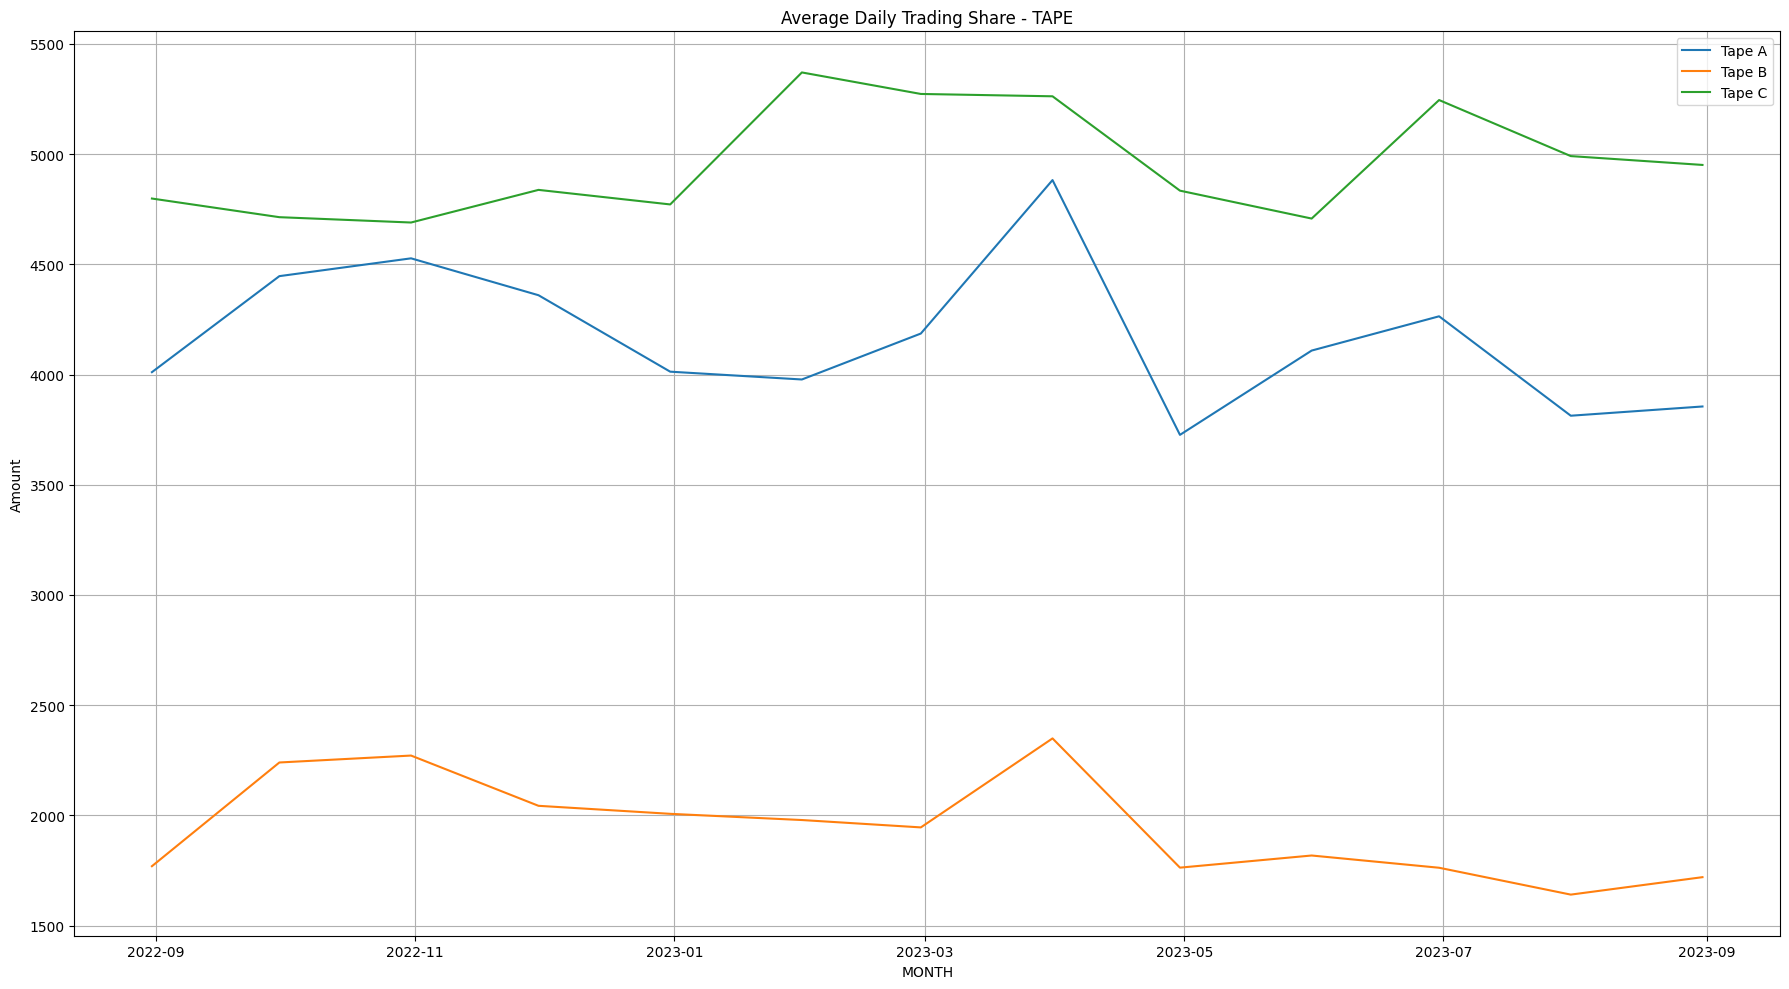

In [63]:
tape_volume = process(path, "ADV #", 7,3)
tape_volume_monthly = tape_volume.iloc[25:]
# tape_volume_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(tape_volume_monthly,"Average Daily Trading Share - TAPE","MONTH","Amount")

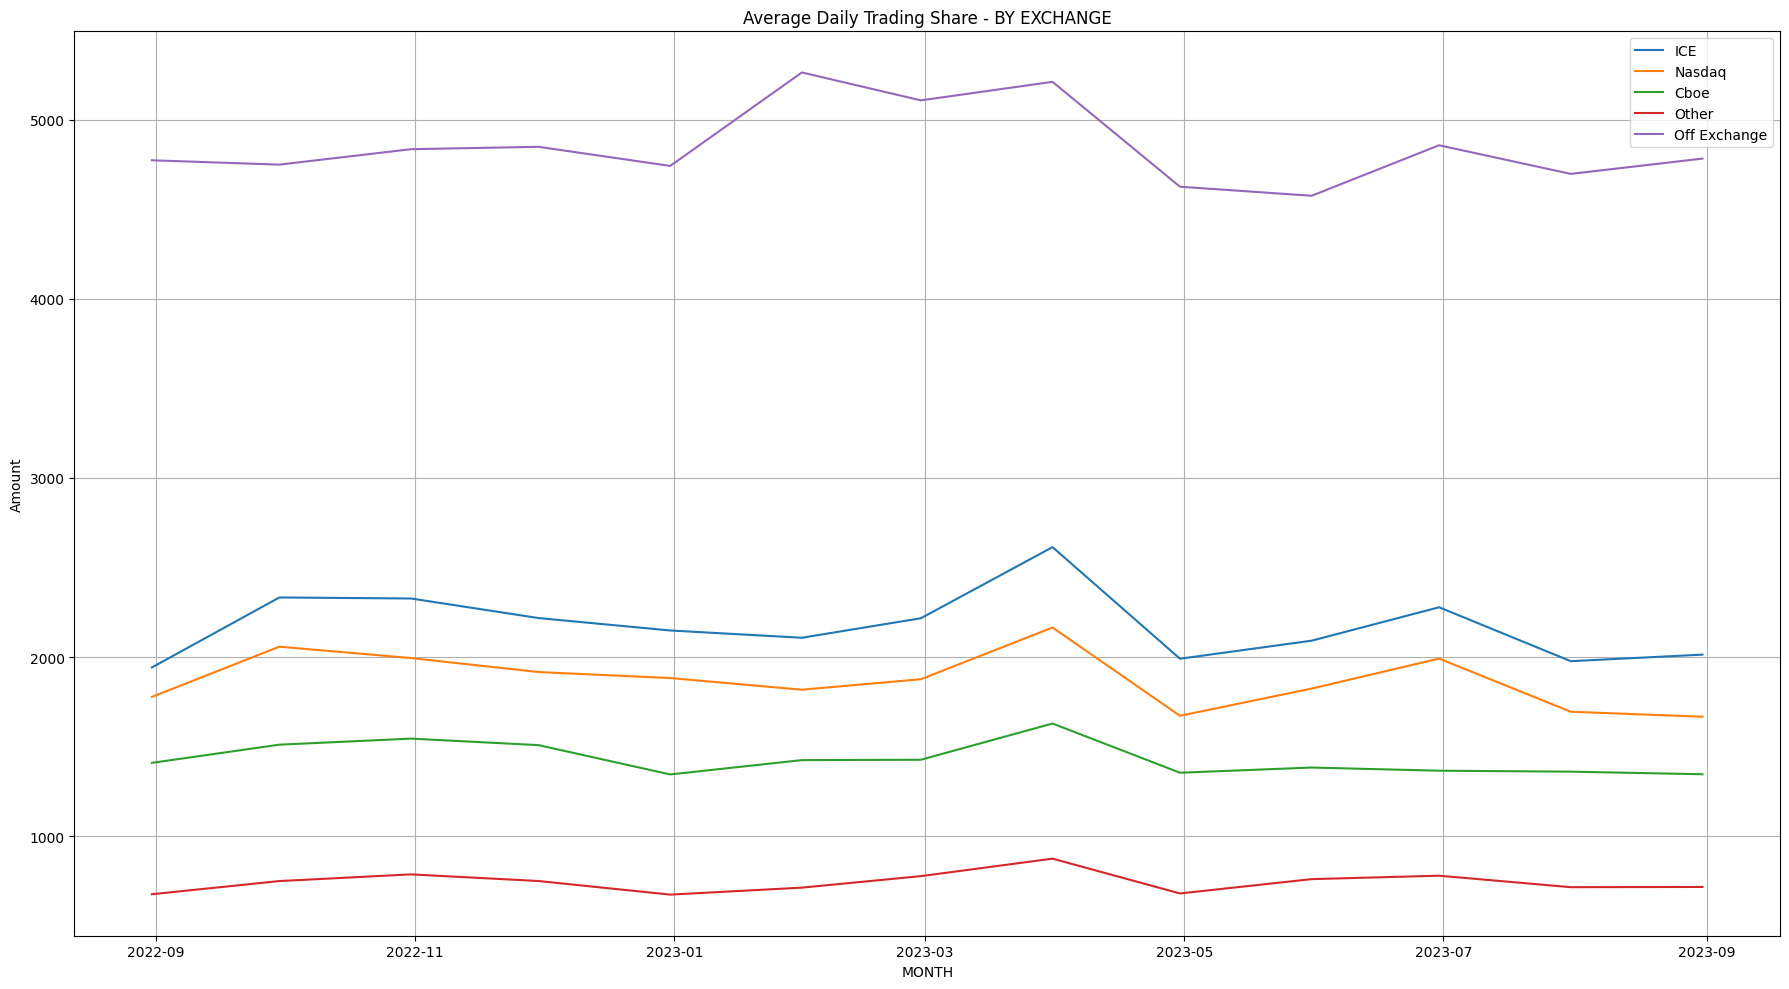

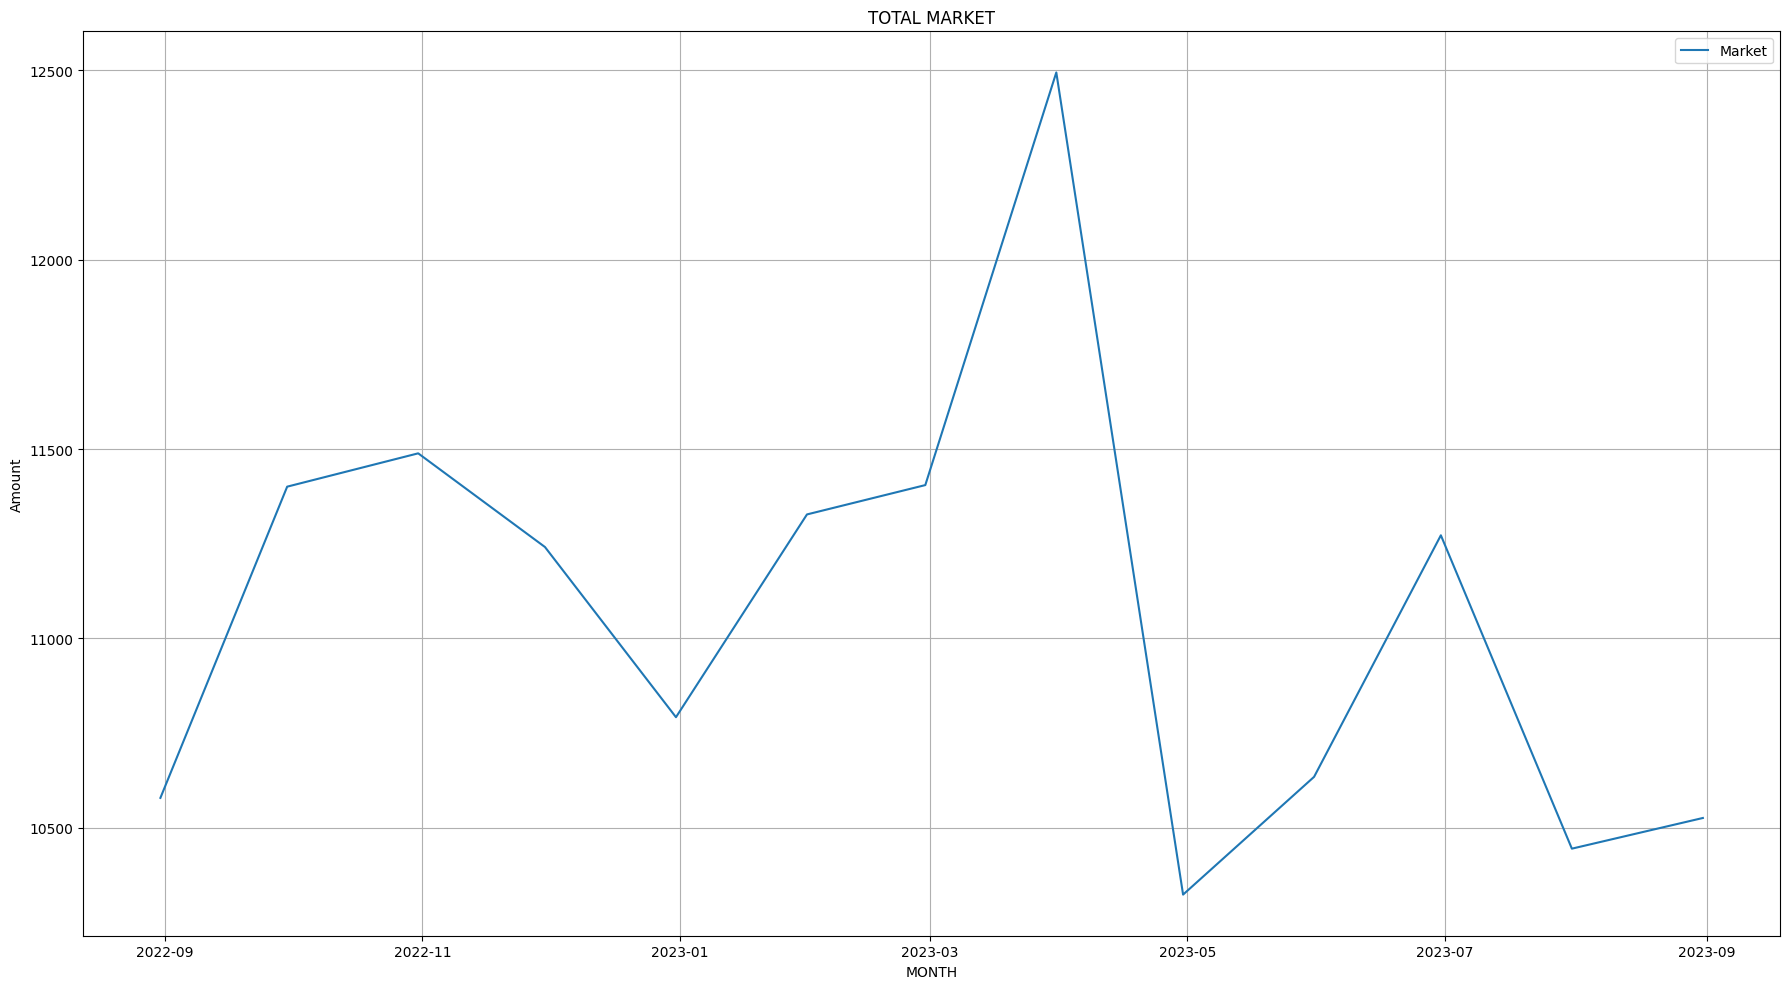

In [75]:
exchange = process(path, "ADV #", 7,9)
exchange_volume_monthly = exchange.iloc[25:,4:]
# exchange_volume_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(exchange_volume_monthly,"Average Daily Trading Share - BY EXCHANGE","MONTH","Amount")

total = process(path, "ADV #", 7,11)
total_monthly = total.iloc[25:,10:]
# exchange_volume_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(total_monthly,"TOTAL MARKET","MONTH","Amount in shares")

In [142]:

# issuance = process(path, "Issuance", 6,7)
# agency_debt_issuance_month = issuance[25:]
# agency_debt_issuance_year = issuance.head(11)
# plt.figure(figsize=(18, 10))
# plot_dataframe(agency_debt_issuance_month,"ISSUANCE","MONTH","Amount in Billions")

# trading_volume = process(path, "Trading Volume" ,6,5 )
# plt.figure(figsize=(18, 10))
# plot_dataframe(trading_volume.head(11),"Trading Volume","YEAR","Amount in Billions")

# outstanding = process(path, "Outstanding" ,6,17 )
# display(outstanding.head(11))

In [ ]:
trading_volume = process(path, "Trading Volume" ,6,5 )
plt.figure(figsize=(18, 10))
plot_dataframe(trading_volume.head(11),"Trading Volume","YEAR","Amount in Billions")

In [30]:
path = "sifma/US-Asset-Backed-Securities-Statistics-SIFMA.xlsx"

In [211]:
# abs_issuance = process(path, "ABS Issuance",9 ,7)
# display(abs_issuance.head(11))
# plt.figure(figsize=(18, 10))
# plot_dataframe(abs_issuance.head(11),"ABS ISSUANCE","YEAR","Amount in Billions")

In [37]:
path = "sifma/US-Corporate-Bonds-Statistics-SIFMA.xlsx"

,Fannie Mae,Freddie Mac,Farm Credit,FHLB,Farmer Mac,TVA,Total
2012,217.297,165.4,119.263,418.075065,3.362,2.135193,925.532258
2013,121.161,112,74.474,341.24327,2.889715,1.151849,652.919834
2014,38.561,89,78.078,348.50678,3.544,1,558.68978
2015,63.766,166.8,105.211,304.333435,4.365865,1,645.4763
2016,93.979,174.8,128.509,524.060575,6.522301,0,927.870876
2017,42.191,93.1,91.122,495.291675,8.609,1,731.313675
2018,15.311,54.7,97.964,476.915,7.698,1,653.588
2019,21.52,186.3,613.72596,157.582,10.201,0,989.32896
2020,185.188,318.5,227.932,505.177675,13.522,1,1251.319675
2021,2.815,22.35,165.185,429.79586,72.302,0.5,692.94786


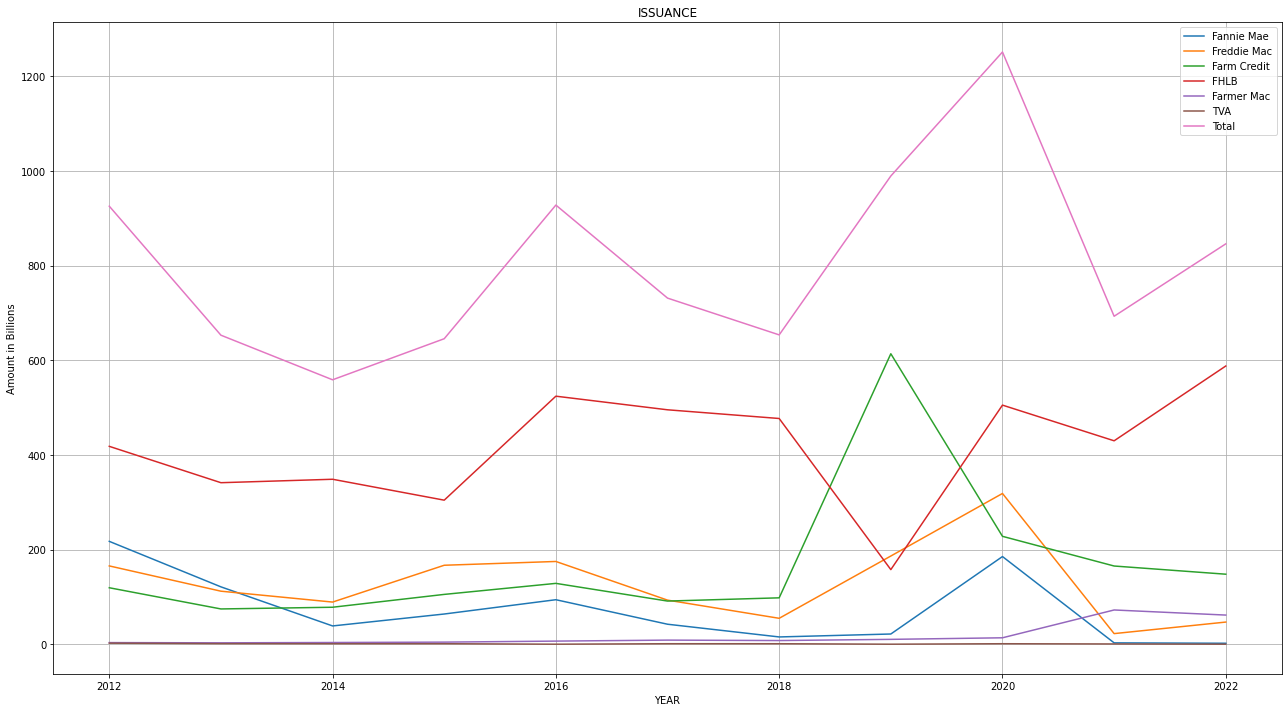

In [120]:
issuance = process(path, "Issuance", 6,7)
display(issuance.head(10))
plt.figure(figsize=(18, 10))
plot_dataframe(issuance.head(11),"ISSUANCE","YEAR","Amount in Billions")

# trading_volume = process(path, "Trading Volume" ,7,7 )
# plt.figure(figsize=(18, 10))
# plot_dataframe(trading_volume.head(11),"Trading Volume","YEAR","Amount in Billions")

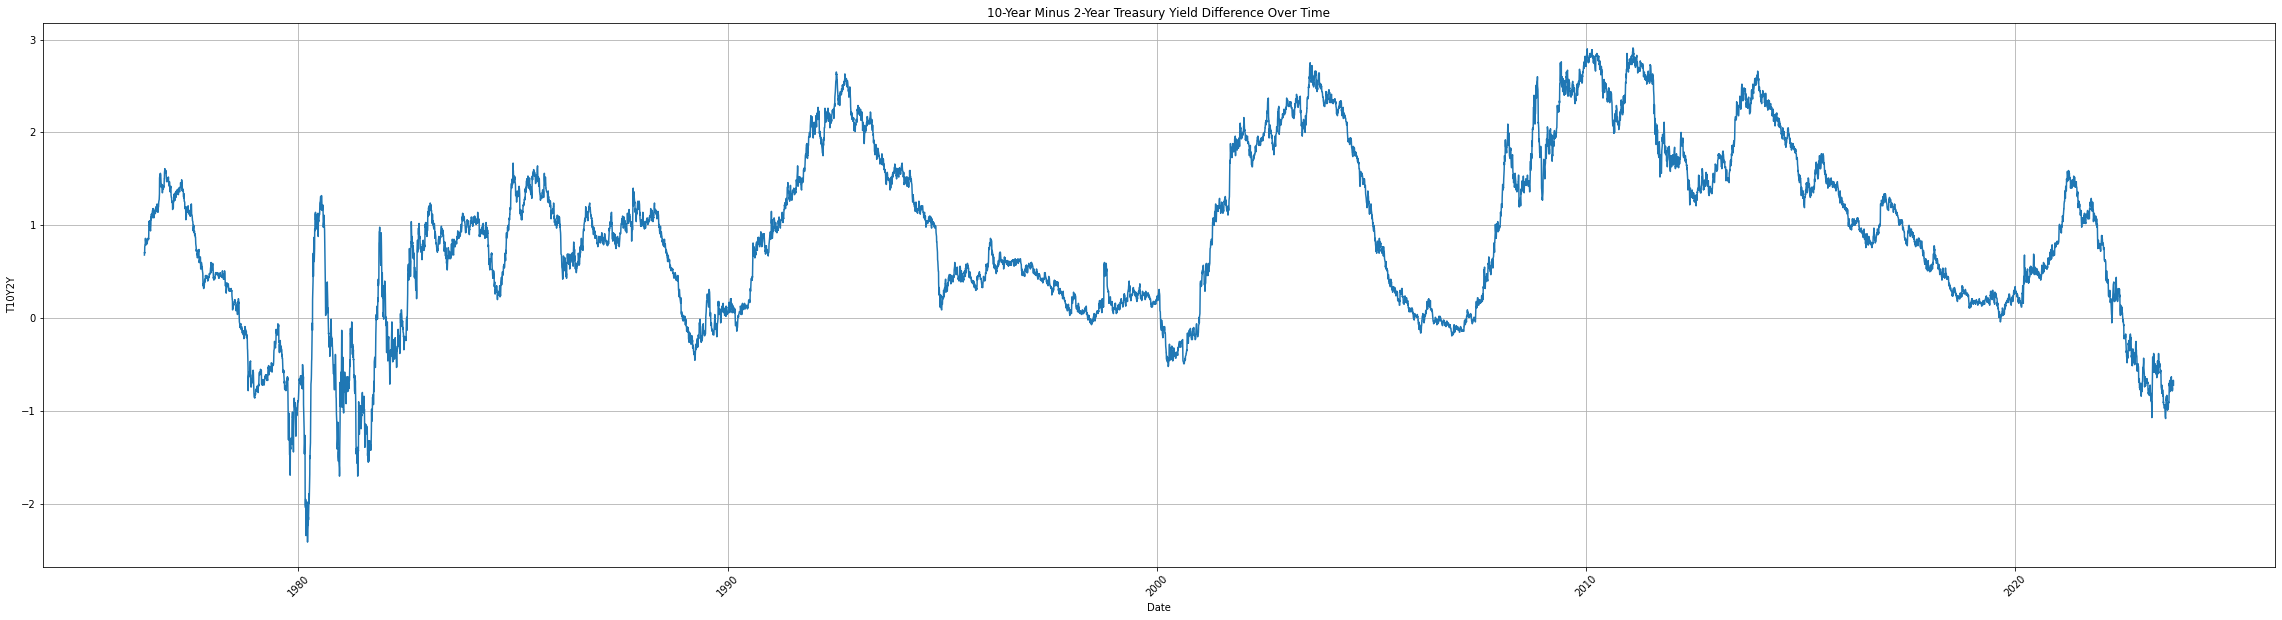

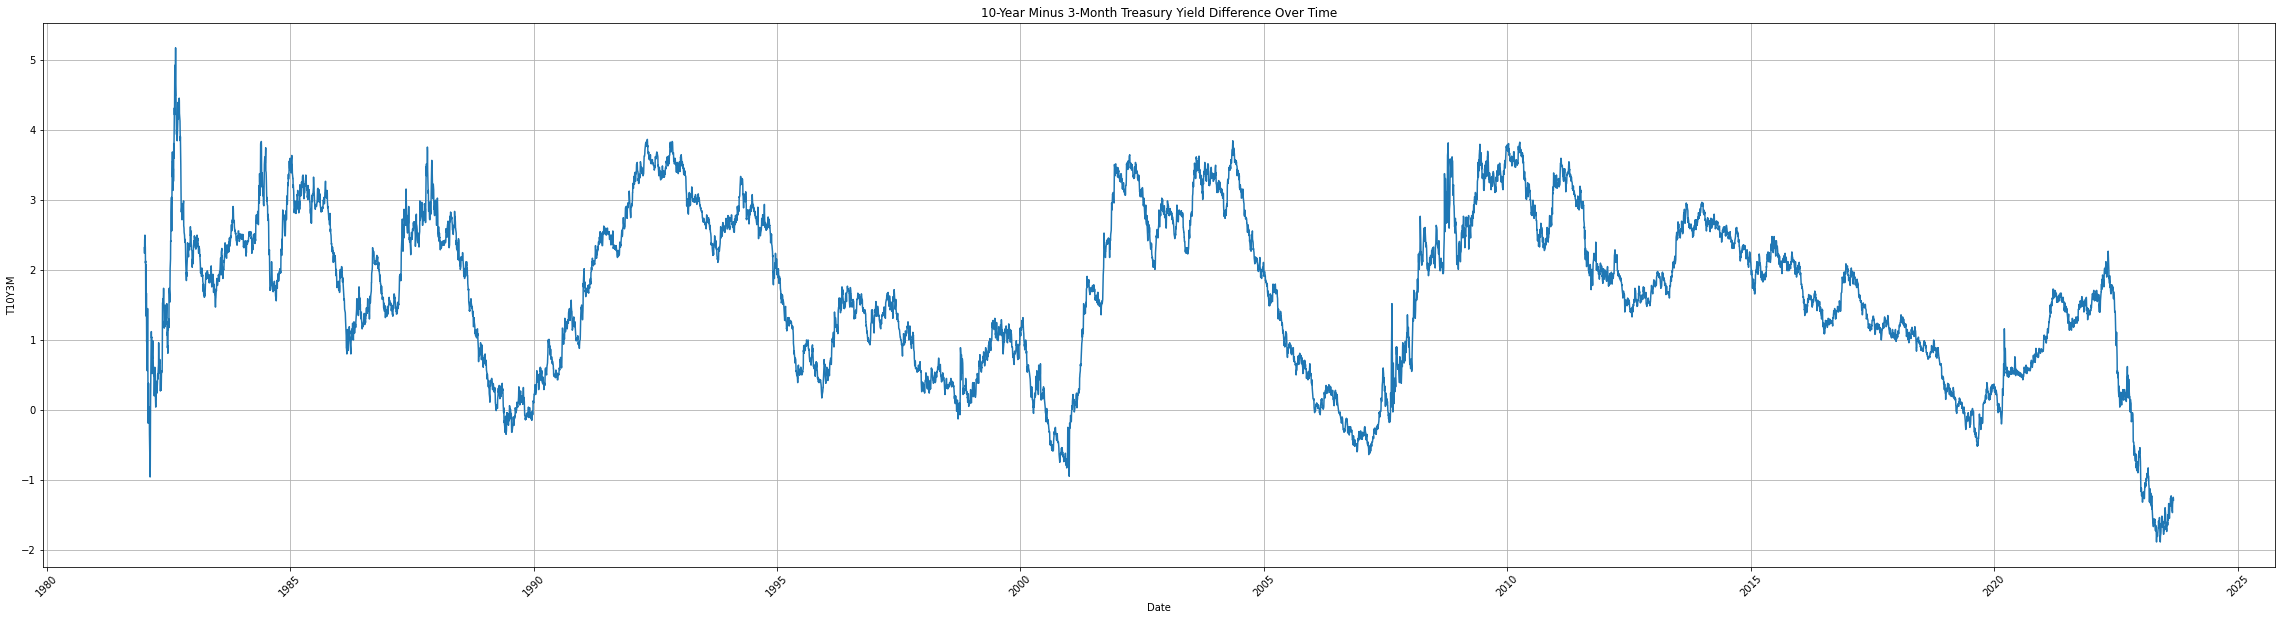

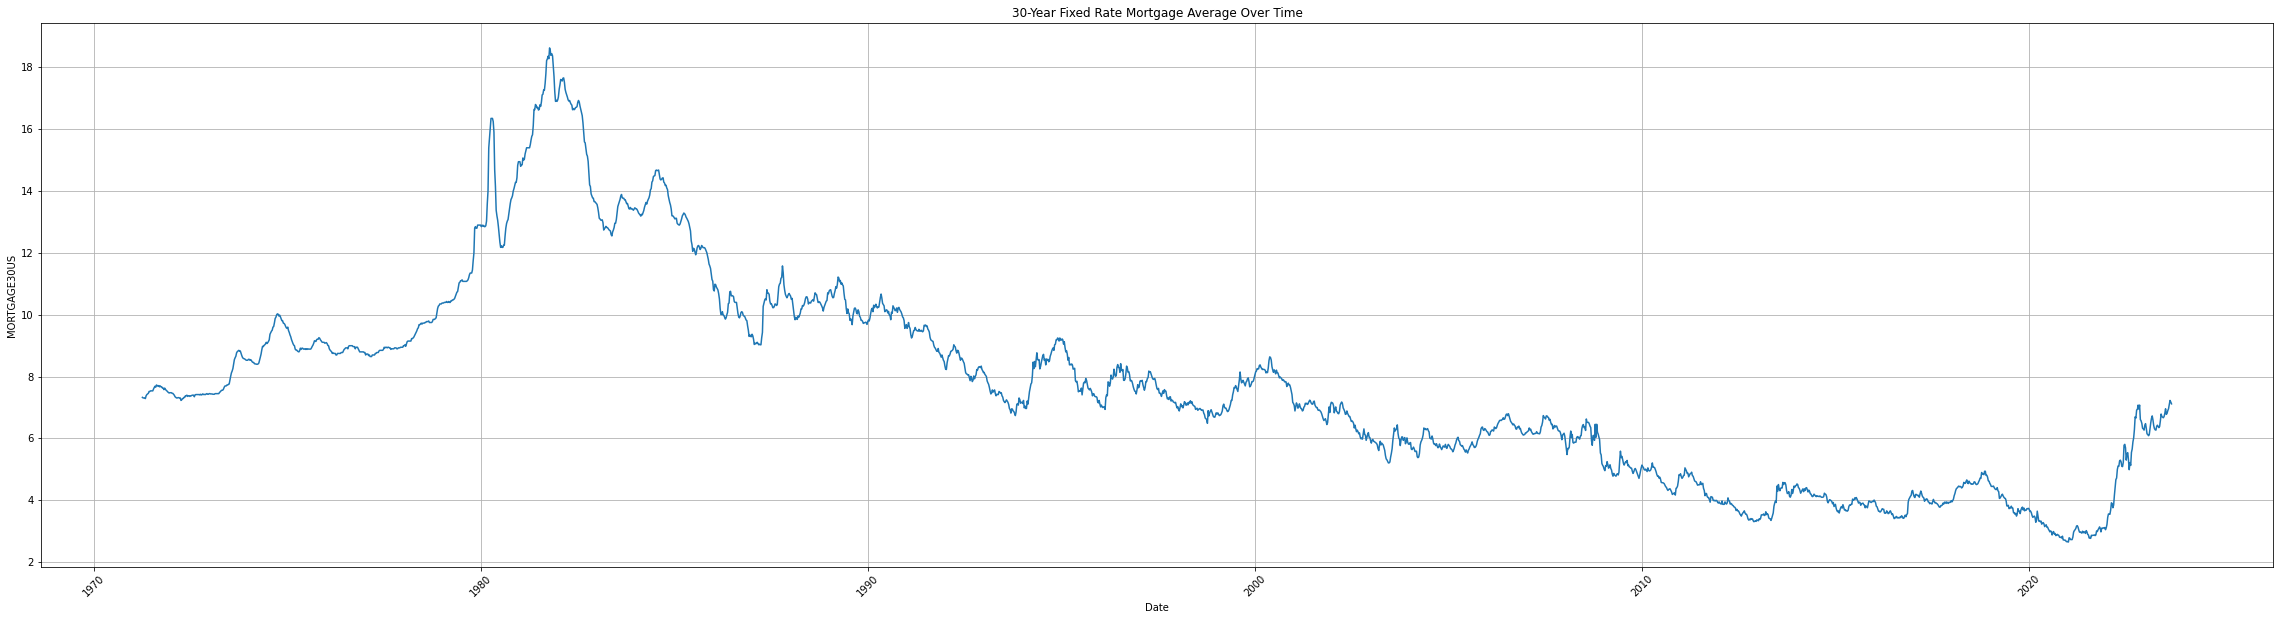

In [88]:
path = "fred/T10Y2Y.xls"
t10y2y = process(path, "FRED Graph", 9,2)
t10y2y = t10y2y[t10y2y['T10Y2Y'] != 0]
# display(t10y2y.head(50))
plt.figure(figsize=(40, 10))
plt.plot(t10y2y.index, t10y2y['T10Y2Y'])
plt.xlabel('Date')
plt.ylabel('T10Y2Y')
plt.title('10-Year Minus 2-Year Treasury Yield Difference Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

path = "fred/T10Y3M.xls"
t10y3m = process(path, "FRED Graph",9,2)
t10y3m = t10y3m[t10y3m['T10Y3M'] != 0]
plt.figure(figsize=(40, 10))
plt.plot(t10y3m.index, t10y3m['T10Y3M'])
plt.xlabel('Date')
plt.ylabel('T10Y3M')
plt.title('10-Year Minus 3-Month Treasury Yield Difference Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

path = "fred/MORTGAGE30US.xls"
mortgage30us = process(path, "FRED Graph",9,2)
# display(mortgage30us.head(10))
plt.figure(figsize=(40, 10))
plt.plot(mortgage30us.index, mortgage30us['MORTGAGE30US'])
plt.xlabel('Date')
plt.ylabel('MORTGAGE30US')
plt.title('30-Year Fixed Rate Mortgage Average Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
